<a href="https://colab.research.google.com/github/Sush1813/Online-Library/blob/main/MalarialCell_Identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os


In [2]:
!pip install kaggle


In [3]:
from google.colab import files

# Upload the Kaggle API key file
uploaded = files.upload()

# Move the uploaded file to the required directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [4]:
!kaggle datasets download -d iarunava/cell-images-for-detecting-malaria


100% 674M/675M [00:19<00:00, 43.3MB/s]
100% 675M/675M [00:19<00:00, 36.2MB/s]


In [5]:
!unzip -q cell-images-for-detecting-malaria.zip -d MalarialCellsDataset


In [6]:
Parasitized_cell = os.listdir('MalarialCellsDataset/cell_images/Parasitized/')
Uninfected_cell = os.listdir('MalarialCellsDataset/cell_images/Uninfected/')

print("Parasitized cell:", len(Parasitized_cell))
print("Uninfected cell:", len(Uninfected_cell))

Parasitized cell: 13780
Uninfected cell: 13780


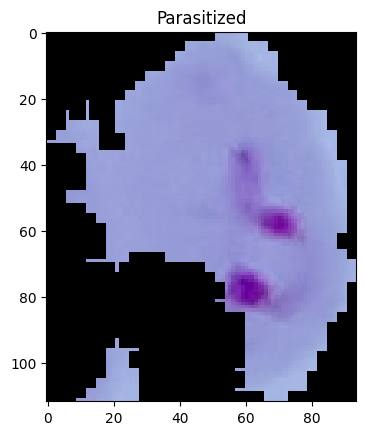

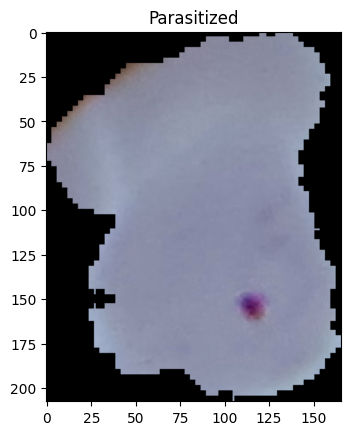

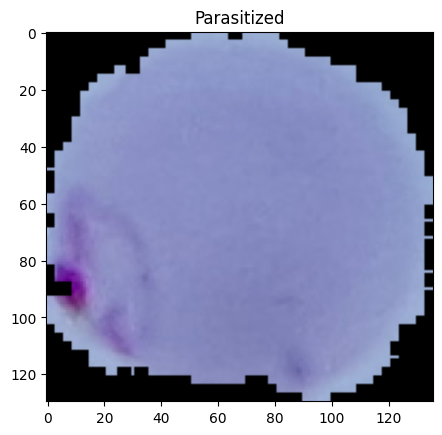

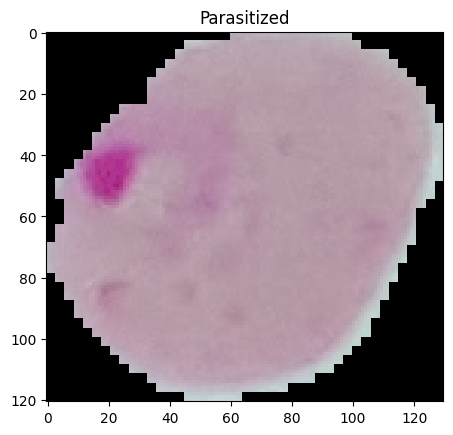

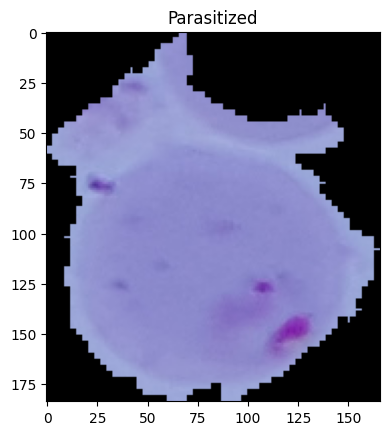

In [7]:
for i in range(5):
    img=cv2.imread('MalarialCellsDataset/cell_images/Parasitized/'+Parasitized_cell[i])
    plt.imshow(img)
    plt.title("Parasitized")
    plt.show()

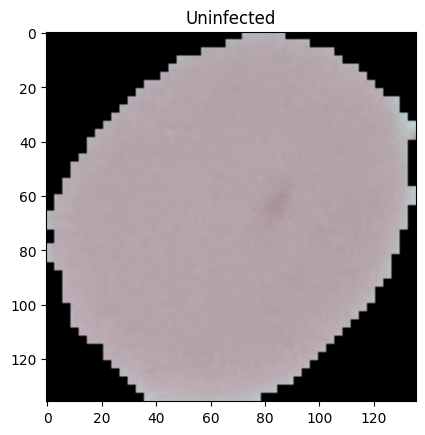

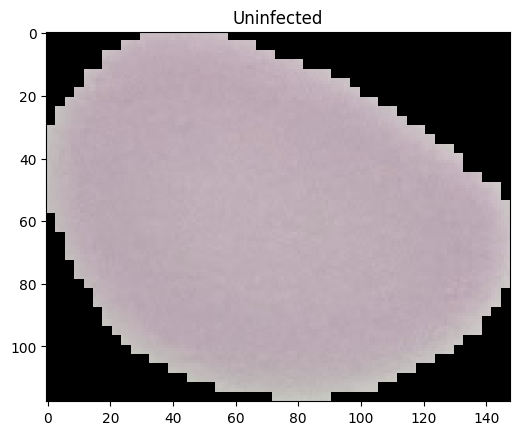

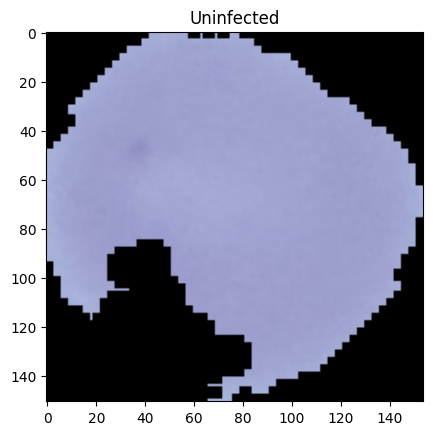

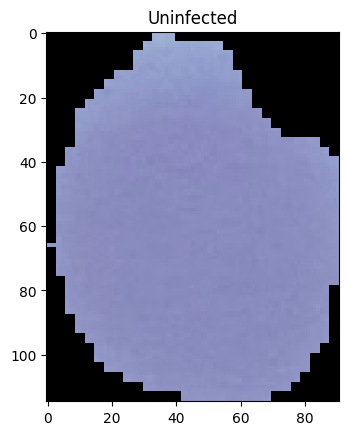

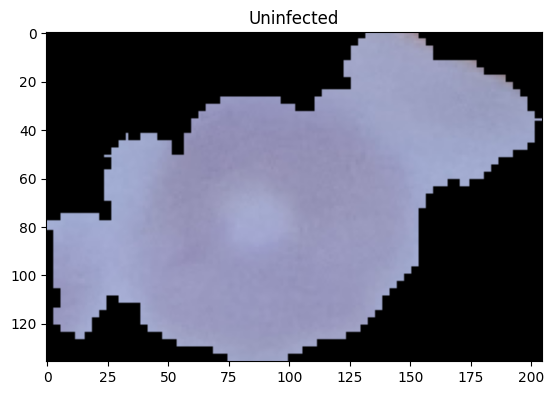

In [20]:
for i in range(5):
    img=cv2.imread('MalarialCellsDataset/cell_images/Uninfected/'+Uninfected_cell[i])
    plt.imshow(img)
    plt.title("Uninfected")
    plt.show()

In [8]:
width = 68
height = 68

In [9]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [10]:
trainDatagen = datagen.flow_from_directory(directory='MalarialCellsDataset/cell_images/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [11]:
trainDatagen.class_indices


{'Parasitized': 0, 'Uninfected': 1}

In [12]:
valDatagen = datagen.flow_from_directory(directory='MalarialCellsDataset/cell_images/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')


Found 5510 images belonging to 2 classes.


In [13]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(width,height,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))


model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 66, 66, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 33, 33, 16)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 33, 33, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 31, 31, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 15, 15, 64)        0

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
history=model.fit_generator(generator=trainDatagen,
                            steps_per_epoch=len(trainDatagen),
                            epochs=6,
                            validation_data=valDatagen ,
                            validation_steps=len(valDatagen )
                           )


Epoch 1/6


<ipython-input-16-140944d553f3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(generator=trainDatagen,


1378/1378 [==============================] - 153s 110ms/step - loss: 0.4099 - accuracy: 0.8351 - val_loss: 0.2812 - val_accuracy: 0.9122
Epoch 2/6
1378/1378 [==============================] - 169s 122ms/step - loss: 0.2375 - accuracy: 0.9277 - val_loss: 0.1948 - val_accuracy: 0.9319
Epoch 3/6
1378/1378 [==============================] - 154s 112ms/step - loss: 0.1948 - accuracy: 0.9343 - val_loss: 0.1748 - val_accuracy: 0.9385
Epoch 4/6
1378/1378 [==============================] - 144s 104ms/step - loss: 0.1771 - accuracy: 0.9434 - val_loss: 0.1716 - val_accuracy: 0.9441
Epoch 5/6
1378/1378 [==============================] - 159s 115ms/step - loss: 0.1639 - accuracy: 0.9489 - val_loss: 0.1721 - val_accuracy: 0.9410
Epoch 6/6
1378/1378 [==============================] - 152s 110ms/step - loss: 0.1521 - accuracy: 0.9534 - val_loss: 0.1750 - val_accuracy: 0.9372


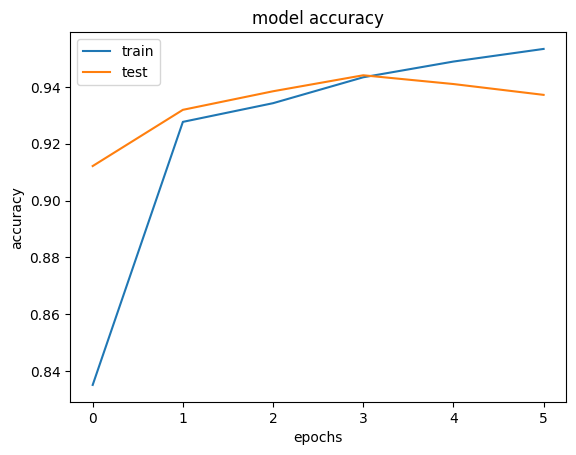

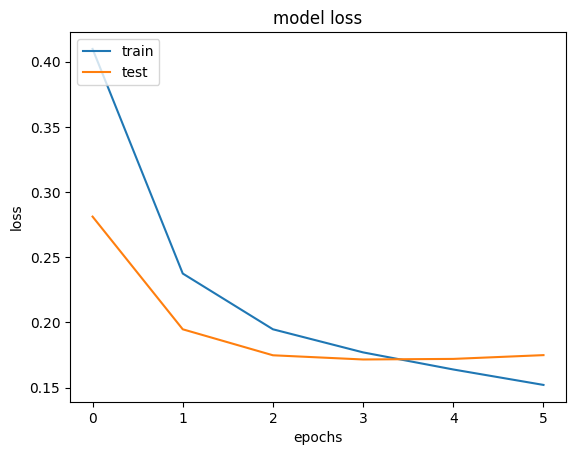

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 242ms/step


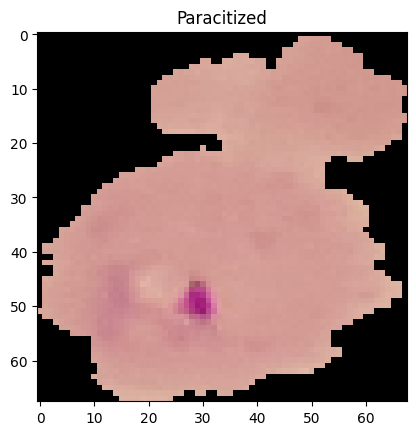

In [18]:
testimg_path="MalarialCellsDataset/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_163.png"
img=image.load_img(testimg_path,target_size=(68,68))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
    plt.title("Paracitized")
else:
    plt.title("Uninfected")

1/1 [==============================] - 0s 24ms/step


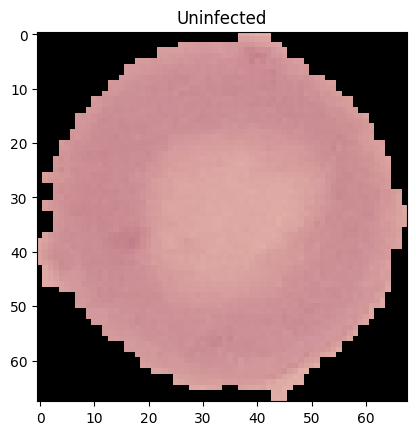

In [19]:
testimg_path="MalarialCellsDataset/cell_images/Uninfected/C99P60ThinF_IMG_20150918_141314_cell_65.png"
img=image.load_img(testimg_path,target_size=(68,68))
plt.imshow(img)

x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
images=np.vstack([x])
val=model.predict(images)
if val==0:
    plt.title("Paracitized")
else:
    plt.title("Uninfected")